## 1: 

Select a singer who has 7 or more records. Choose three 5me periods from this singer’s career. For example, early (first album), middle (3rd or 4th album), and now (latest album). From each album scrape as much data as possible for three songs including the lyrics. I choose Ariana Grande for this project.


In [13]:
import spotipy
import pandas as pd

# Initialize Spotipy client
sp = spotipy.Spotify()

# Initialize an empty dictionary to store album information
output = {"AlbumName": [], "ReleaseYear": []}

# To access the Spotify API, you need to authorize your client
from spotipy.oauth2 import SpotifyClientCredentials

# Replace with your own client ID and secret
client_credentials_manager = SpotifyClientCredentials(
    client_id="d8163f7fb09c468cb994ff2fbc4b8919",
    client_secret='ab9135d6b3704525b263209ec73fcc7c'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Artist URI for Ariana Grande
ariana_grande_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

results = sp.artist_albums(ariana_grande_uri, album_type='album')
albums = results['items']

while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    album_name = album['name']
    release_date = album['release_date']

    # Extract the year from the release date
    release_year = release_date.split('-')[0]

    print(f"Album: {album_name}, Release Year: {release_year}")
    
    # Append album information to the dictionary
    output['AlbumName'].append(album_name)
    output['ReleaseYear'].append(int(release_year))  # Convert release_year to integer for sorting

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(output)

# Sort the DataFrame by ReleaseYear
sorted_results_df = results_df.sort_values(by='ReleaseYear')

# Save the sorted DataFrame to a CSV file
sorted_results_df.to_csv('ariana_grande_albums_sorted.csv', index=False)

print("Done")


Album: Yours Truly (Tenth Anniversary Edition), Release Year: 2023
Album: Positions (Deluxe), Release Year: 2021
Album: Positions, Release Year: 2020
Album: k bye for now (swt live), Release Year: 2019
Album: thank u, next, Release Year: 2019
Album: Sweetener, Release Year: 2018
Album: Dangerous Woman, Release Year: 2016
Album: My Everything (Deluxe), Release Year: 2014
Album: Yours Truly, Release Year: 2013
Done


In [14]:
import spotipy
import pandas as pd
import azapi

# Initialize a Spotify client
sp = spotipy.Spotify()

# Initialize an empty list to store song data
song_data = []

# Initialize Azapi to get lyrics
API = azapi.AZlyrics()

# To access the Spotify API, you need to authorize your client
from spotipy.oauth2 import SpotifyClientCredentials

# Replace with your own client ID and secret
client_credentials_manager = SpotifyClientCredentials(
    client_id="d8163f7fb09c468cb994ff2fbc4b8919",
    client_secret='ab9135d6b3704525b263209ec73fcc7c'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Artist URI for Taylor Swift
ariana_grande_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

results = sp.artist_albums(ariana_grande_uri, album_type='album')
albums = results['items']

while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

# Define the selected albums
selected_albums = [
    {"name": "Yours Truly", "year": 2013},
    {"name": "Sweetener", "year": 2018},
    {"name": "Yours Truly (Tenth Anniversary Edition)", "year": 2023}
]

# Function to fetch lyrics for a song
def fetch_lyrics(song_name, artist):
    try:
        API.artist = artist
        API.title = song_name
        API.getLyrics(save=False)
        lyrics = API.lyrics
        return lyrics if lyrics else "Lyrics not found"
    except Exception as e:
        return "Lyrics not found"

# Loop through the albums
for album in albums:
    album_name = album['name']
    release_year = int(album['release_date'].split('-')[0])

    # Check if the current album is in the selected albums list
    if any(selected_album["name"] == album_name and selected_album["year"] == release_year for selected_album in selected_albums):

        # Get the album tracks
        album_tracks = sp.album_tracks(album['uri'])['items']

        # Limit to a maximum of three songs
        for track in album_tracks[:3]:
            track_name = track['name']

            # Fetch lyrics for the song
            lyrics = fetch_lyrics(track_name, 'Yours Truly')

            # Get audio features for the track
            audio_features = sp.audio_features(track['uri'])[0]

            # Get track popularity
            track_info = sp.track(track['uri'])
            track_popularity = track_info['popularity']

            song_data.append({
                "Artist": 'Ariana Grande',
                "AlbumName": album_name,
                "ReleaseYear": release_year,
                "TrackName": track_name,
                "Lyrics": lyrics,
                "Acousticness": audio_features["acousticness"],
                "Danceability": audio_features["danceability"],
                "Energy": audio_features["energy"],
                "Instrumentalness": audio_features["instrumentalness"],
                "Liveness": audio_features["liveness"],
                "Loudness": audio_features["loudness"],
                "Speechiness": audio_features["speechiness"],
                "Tempo": audio_features["tempo"],
                "Valence": audio_features["valence"],
                "Popularity": track_popularity
            })

# Create a DataFrame from the scraped data
df = pd.DataFrame(song_data)

# Save the data to a CSV file
df.to_csv('hw3_ariana_grande_songs_features.csv')

print("Data scraping and saving complete.")

Failed to find lyrics. Trying to get link from Google
Failed to find lyrics. Trying to get link from Google
Failed to find lyrics. Trying to get link from Google
Failed to find lyrics. Trying to get link from Google
Similarity < 0.6
Failed to find lyrics. Trying to get link from Google
Google found nothing!
Failed to find lyrics. Trying to get link from Google
Google found nothing!
Failed to find lyrics. Trying to get link from Google
Data scraping and saving complete.


In [9]:
import spotipy
import lyricsgenius

# Initialize Spotipy client
sp = spotipy.Spotify()

# Initialize a LyricsGenius client
genius = lyricsgenius.Genius("B65GedJh4tVjxUOo7xly-Hce8iC4GK6fiEPzb-ltEnpwIVoi55do_oVTelYVXnln")

# To access the Spotify API, you need to authorize your client
from spotipy.oauth2 import SpotifyClientCredentials

# Replace with your own Spotify client ID and secret
client_credentials_manager = SpotifyClientCredentials(
    client_id="d8163f7fb09c468cb994ff2fbc4b8919",
    client_secret='ab9135d6b3704525b263209ec73fcc7c'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Artist URI for Ariana Grande
ariana_grande_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

# Define the albums you want to get data from
album_uris = [
    'https://open.spotify.com/album/5xSvNPstcxHtR4ap2vvN8A',  # First album
    'https://open.spotify.com/album/3tx8gQqWbGwqIGZHqDNrGe',  # Middle album
    'https://open.spotify.com/album/2VSBGJ8bUuNgmOYXHIQagM'   # Latest album
]

# Initialize an empty list to store song data
song_data = []

for album_uri in album_uris:
    album_info = sp.album(album_uri)
    album_name = album_info['name']
    release_date = album_info['release_date']

    # Get the tracks from the album
    tracks = sp.album_tracks(album_uri)['items']
    
    # Select three songs from the album
    selected_songs = tracks[:3]

    for track in selected_songs:
        song_name = track['name']
        track_number = track['track_number']

        # Get lyrics using Genius API
        song = genius.search_song(song_name, ariana_grande_uri)
        lyrics = song.lyrics if song else "Lyrics not found"

        # Append data to song_data list
        song_data.append({
            "AlbumName": album_name,
            "ReleaseYear": release_date.split('-')[0],
            "SongName": song_name,
            "TrackNumber": track_number,
            "Lyrics": lyrics
        })

# Create a DataFrame from the song_data list
results_df = pd.DataFrame(song_data)

# Print the results or save to a CSV file
print(results_df)

#To save to a CSV file
results_df.to_csv('ariana_grande_songs_data.csv', index=False)


Searching for "Honeymoon Avenue" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'Honeymoon Avenue spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
Searching for "Baby I" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'Baby I spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
Searching for "Right There" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'Right There spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
Searching for "raindrops (an angel cried)" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'raindrops (an angel cried) spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
Searching for "blazed (feat. Pharrell Williams)" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'blazed (feat. Pharrell Williams) spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'
Searching for "the light is coming (feat. Nicki Minaj)" by spotify:artist:66CXWjxzNUsdJxJ2JdwvnR...
No results found for: 'the light is coming (feat. Nicki Minaj) spotify:artist:66CXWjxzNUsdJxJ2Jdwv

In [15]:
import spotipy
import lyricsgenius

# Initialize Spotipy client
sp = spotipy.Spotify()

# Initialize a LyricsGenius client
genius = lyricsgenius.Genius("B65GedJh4tVjxUOo7xly-Hce8iC4GK6fiEPzb-ltEnpwIVoi55do_oVTelYVXnln")

# To access the Spotify API, you need to authorize your client
from spotipy.oauth2 import SpotifyClientCredentials

# Replace with your own Spotify client ID and secret
client_credentials_manager = SpotifyClientCredentials(
    client_id="d8163f7fb09c468cb994ff2fbc4b8919",
    client_secret='ab9135d6b3704525b263209ec73fcc7c'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Artist URI for Ariana Grande
ariana_grande_uri = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

# Define the albums you want to get data from
album_uris = [
    'https://open.spotify.com/album/5xSvNPstcxHtR4ap2vvN8A',  # First album
    'https://open.spotify.com/album/3tx8gQqWbGwqIGZHqDNrGe',  # Middle album
    'https://open.spotify.com/album/2VSBGJ8bUuNgmOYXHIQagM'   # Latest album
]

# Initialize an empty list to store song data
song_data = []

for album_uri in album_uris:
    album_info = sp.album(album_uri)
    album_name = album_info['name']
    release_date = album_info['release_date']

    # Get the tracks from the album
    tracks = sp.album_tracks(album_uri)['items']
    
    for track in tracks:
        song_name = track['name']
        track_number = track['track_number']

        # Get lyrics using Genius API
        song = genius.search_song(song_name, "Ariana Grande")
        lyrics = song.lyrics if song else "Lyrics not found"

        # Append data to song_data list
        song_data.append({
            "Artist": "Ariana Grande",
            "AlbumName": album_name,
            "ReleaseYear": release_date.split('-')[0],
            "SongName": song_name,
            "TrackNumber": track_number,
            "Lyrics": lyrics
        })

# Create a DataFrame from the song_data list
results_df = pd.DataFrame(song_data)

# Print the results or save to a CSV file
print(results_df)

#To save to a CSV file
results_df.to_csv('ariana_grande_songs_data.csv', index=False)


Searching for "Honeymoon Avenue" by Ariana Grande...
Done.
Searching for "Baby I" by Ariana Grande...
Done.
Searching for "Right There" by Ariana Grande...
Done.
Searching for "Tattooed Heart" by Ariana Grande...
Done.
Searching for "Lovin' It" by Ariana Grande...
Done.
Searching for "Piano" by Ariana Grande...
Done.
Searching for "Daydreamin'" by Ariana Grande...
Done.
Searching for "The Way" by Ariana Grande...
Done.
Searching for "You’ll Never Know" by Ariana Grande...
Done.
Searching for "Almost Is Never Enough" by Ariana Grande...
Done.
Searching for "Popular Song" by Ariana Grande...
Done.
Searching for "Better Left Unsaid" by Ariana Grande...
Done.
Searching for "raindrops (an angel cried)" by Ariana Grande...
Done.
Searching for "blazed (feat. Pharrell Williams)" by Ariana Grande...
Done.
Searching for "the light is coming (feat. Nicki Minaj)" by Ariana Grande...
Done.
Searching for "R.E.M" by Ariana Grande...
Done.
Searching for "God is a woman" by Ariana Grande...
Done.
Searc

## 2: 
For each selected album, draw a word cloud to represent the singer’s top words. Reflect on the similari5es and differences among the word clouds. 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soudabeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


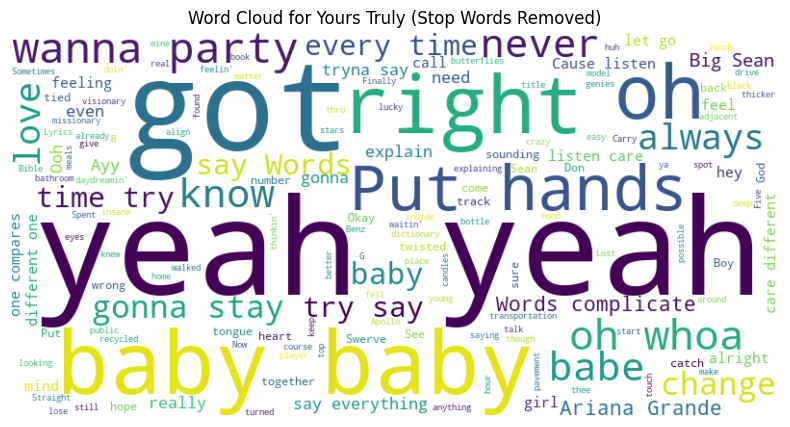

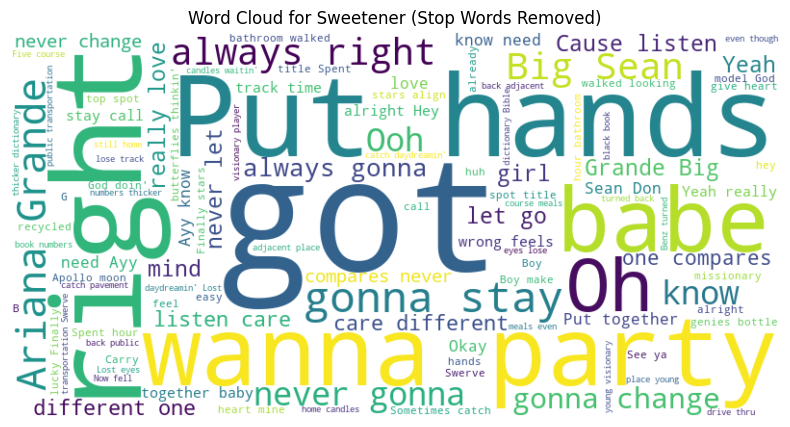

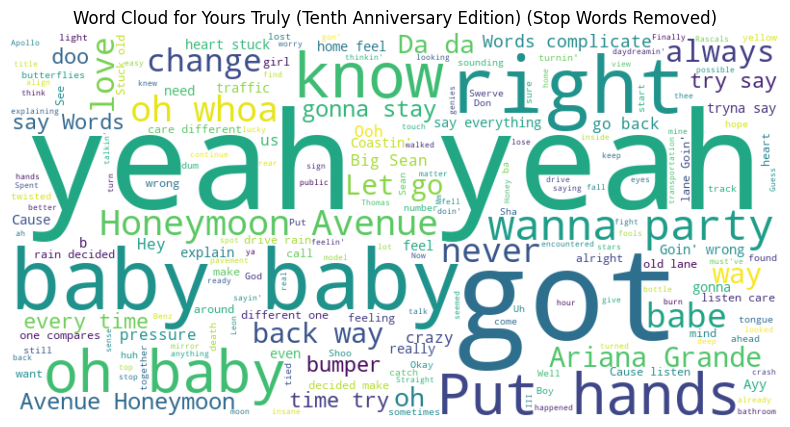

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

# Generate word clouds for each album
# Concatenate lyrics for each album
lyrics_for_albums = {}
for album in selected_albums:
    album_name = album["name"]
    lyrics_for_album = df[df["AlbumName"] == album_name]["Lyrics"].str.cat(sep=' ')
    lyrics_for_albums[album_name] = lyrics_for_album

# Define a function to remove stop words from the lyrics
def remove_stop_words(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Remove stop words from the lyrics for each album
for album_name, lyrics_for_album in lyrics_for_albums.items():
    lyrics_for_albums[album_name] = remove_stop_words(lyrics_for_album)

# Generate word clouds for each album
for album_name, lyrics_for_album in lyrics_for_albums.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_for_album)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {album_name} (Stop Words Removed)')
    plt.axis('off')
    plt.show()

## 3:
For each scraped song, perform a strongest emo5on analysis from the lyrics. Based on your findings, to what extent you consider the results accurate? 

In [19]:
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data
#This text file is an input to build an emotion detection classifier.
file = 'ariana_grande_songs_data.csv'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

def ngram(token, n):
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
    return output

def create_feature(text, nrange=(1, 1)):
    text_features = []
    text = text.lower()
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1):
        text_features += ngram(text_alphanum.split(), n)
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)


def convert_label(item, name):
    label = [0] * len(name)
    items = item.split()
    for idx, emotion in enumerate(name):
        if emotion in items:
            label[idx] = 1
    return label



emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

#I am using only the random forest classifier from the tutorial
clifs = [rforest]

# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

emoji_dict = {"joy":"joy", "fear":"fear", "anger":"anger", "sadness":"sadness", "disgust":"disgust", "shame":"shame", "guilt":"quilt"}

import pandas
#Let's use our lyrics data to classify songs with respect to the emotions above

inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('ariana_grande_songs_data.csv', header=[0], index_col=0).to_dict()


# I created a new dictionary here for the description column in my csv file
# Load the data directly and extract the 'EnglishLyrics' column
lyricsdictionary = pandas.read_csv('ariana_grande_songs_data.csv')['Lyrics']

#print(type(descriptiondictionary))

if not lyricsdictionary.empty:
# I am converting the dictionary to a list so I can analyze the data
    lyricslist =  list(lyricsdictionary)
    
    emotionresults_list=[]
    for text in lyricslist :
        features = create_feature(text, nrange=(1, 4))
        features = vectorizer.transform(features)
        prediction = clf.predict(features)
        max_emotion = max(zip(emotions, prediction[0]), key=lambda x: x[1])
        #emotions_predicted = [emoji_dict[emotion] for emotion, presence in zip(emotions, prediction) if presence.any() == 1]
        print("Emotion:", max_emotion[0])
        emotionresults_list.append(max_emotion[0])
        #emotionresults_list.extend(emotions_predicted)
    
   # for text in lyricslist:
     #   features = create_feature(text, nrange=(1, 4))
     #   features = vectorizer.transform(features)
      #  prediction = clf.predict(features)
      #  print("Prediction:", prediction)
     #   max_emotion = max(zip(emotions, prediction[0]), key=lambda x: x[1])
     #   print("Max Emotion:", max_emotion[0])
     #   emotionresults_list.append(max_emotion[0])
    

file = pandas.read_csv('ariana_grande_songs_data.csv')
file['Emotion'] = emotionresults_list

file.to_csv('hw3emotionresults.csv')
print("done")


Number of instances: 4359
| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| RandomForestClassifier    |         1.0000000 |     1.0000000 |
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
Emotion: joy
done


In [ ]:
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

# Cross-validation code
from sklearn.model_selection import cross_val_score

# Define your classifier (RandomForestClassifier in this case)
clf = RandomForestClassifier(random_state=123)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_all, y_all, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

## 4:
This is an explorative data analysis question. Use all scraped data to identify what feature or features positively relate to the popularity of your selected singer’s songs. Explain your findings via scatter plots or some other form of visualization.

Index(['Unnamed: 0', 'Artist', 'AlbumName', 'ReleaseYear', 'TrackName',
       'Lyrics', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence',
       'Popularity'],
      dtype='object')


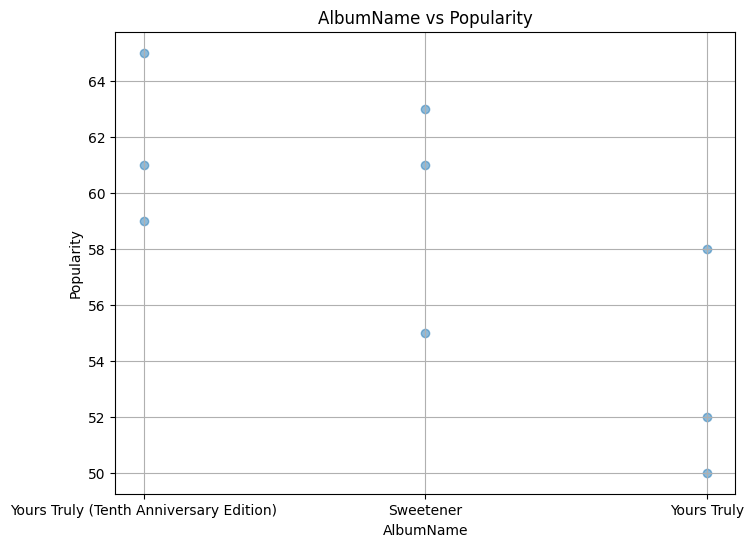

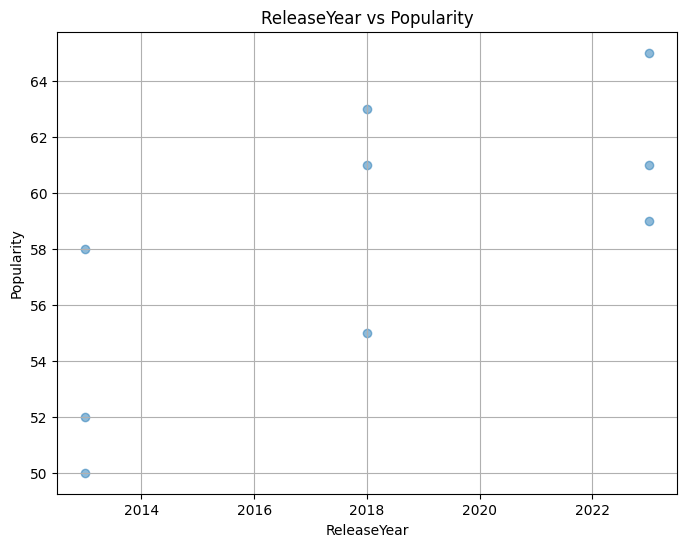

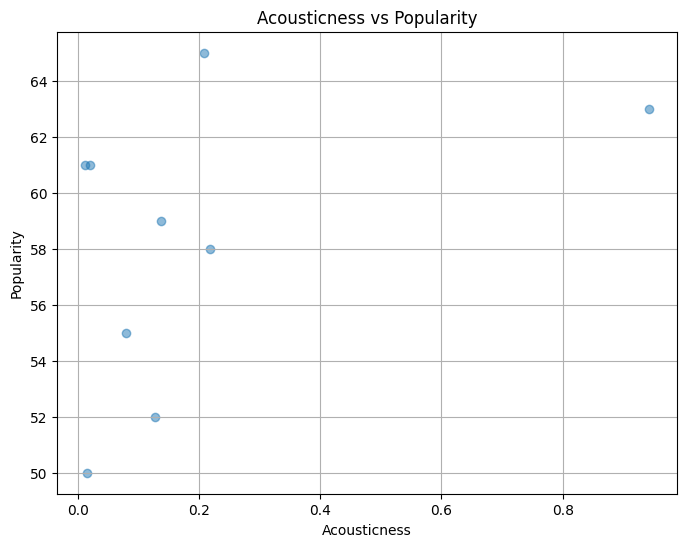

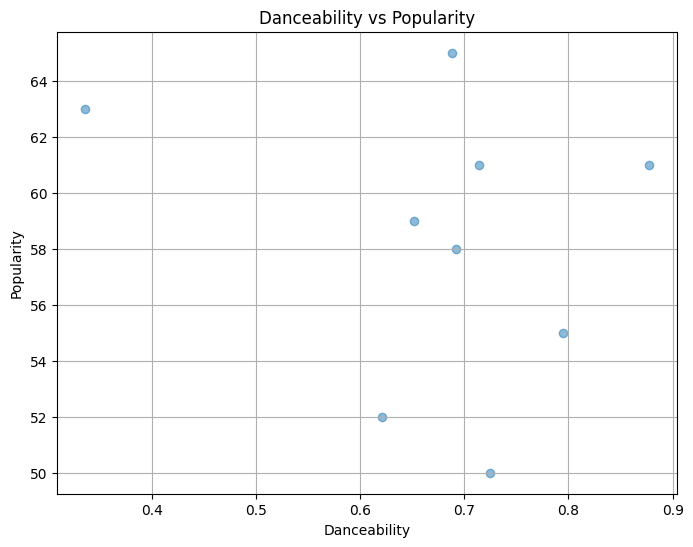

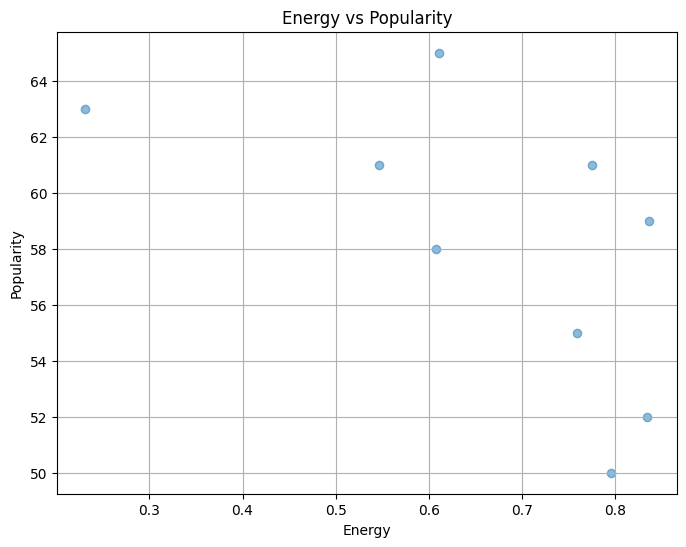

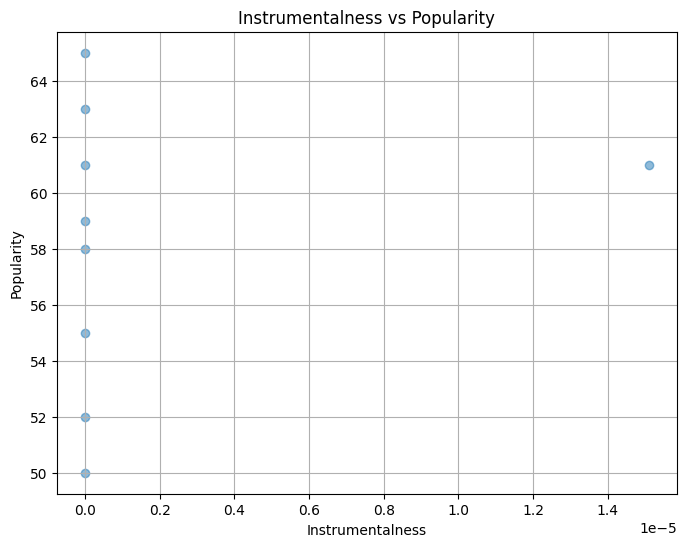

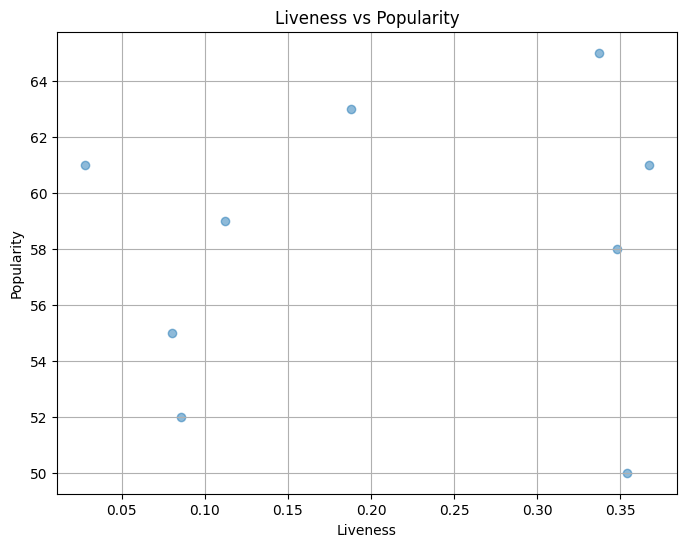

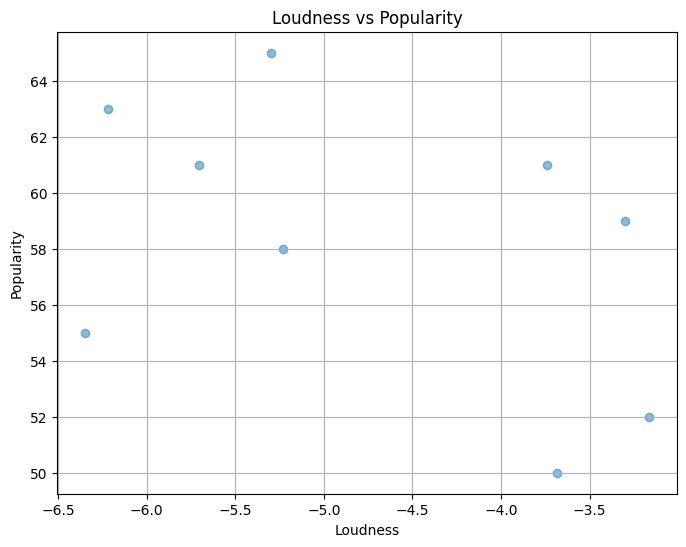

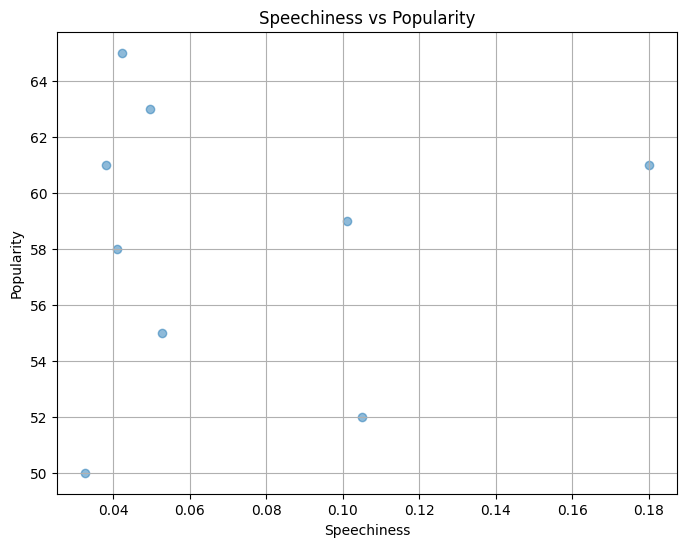

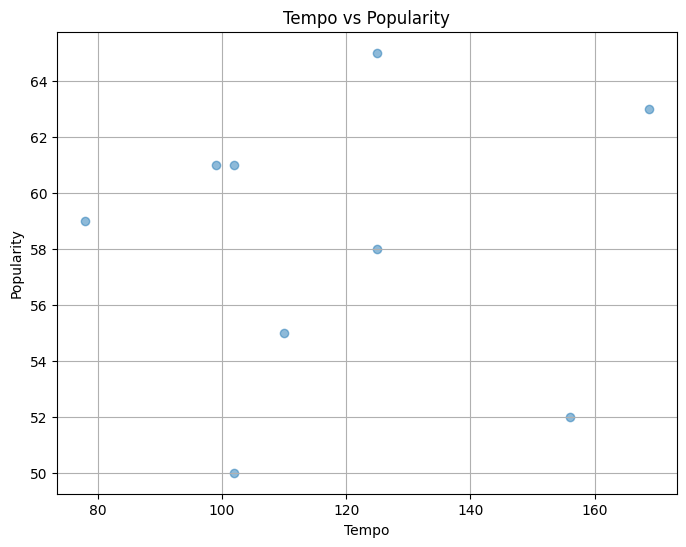

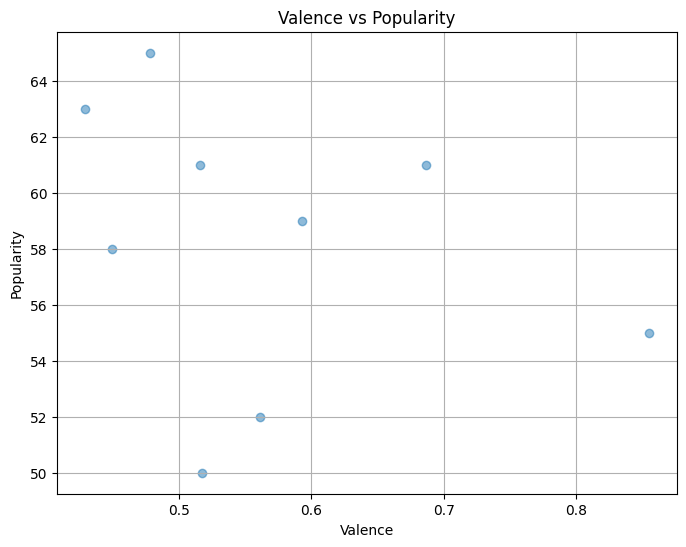

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file with the data
df = pd.read_csv('hw3_ariana_grande_songs_features.csv')

# Check the column names
print(df.columns)

# List of features
features = ["AlbumName","ReleaseYear","Acousticness",
            "Danceability","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]

# Create scatter plots for each feature vs. Popularity
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Popularity'], alpha=0.5)
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.grid()
    plt.show()


In [73]:
# List of features
#features = ["Acousticness",
          #  "Danceability","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]

#boxplot(features, ncols=2)

#plt.show()

                  Acousticness  Danceability    Energy  Instrumentalness  \
Acousticness          1.000000     -0.906103 -0.836603         -0.236640   
Danceability         -0.906103      1.000000  0.561361          0.500875   
Energy               -0.836603      0.561361  1.000000         -0.229439   
Instrumentalness     -0.236640      0.500875 -0.229439          1.000000   
Liveness             -0.007745     -0.111433  0.011162         -0.491616   
Loudness             -0.444036      0.046728  0.717460         -0.283719   
Speechiness          -0.231283      0.351483  0.002157          0.835779   
Tempo                 0.713582     -0.706962 -0.567986         -0.251950   
Valence              -0.466058      0.610295  0.361275          0.340989   
Popularity            0.418816     -0.224657 -0.606194          0.207528   

                  Liveness  Loudness  Speechiness     Tempo   Valence  \
Acousticness     -0.007745 -0.444036    -0.231283  0.713582 -0.466058   
Danceability     

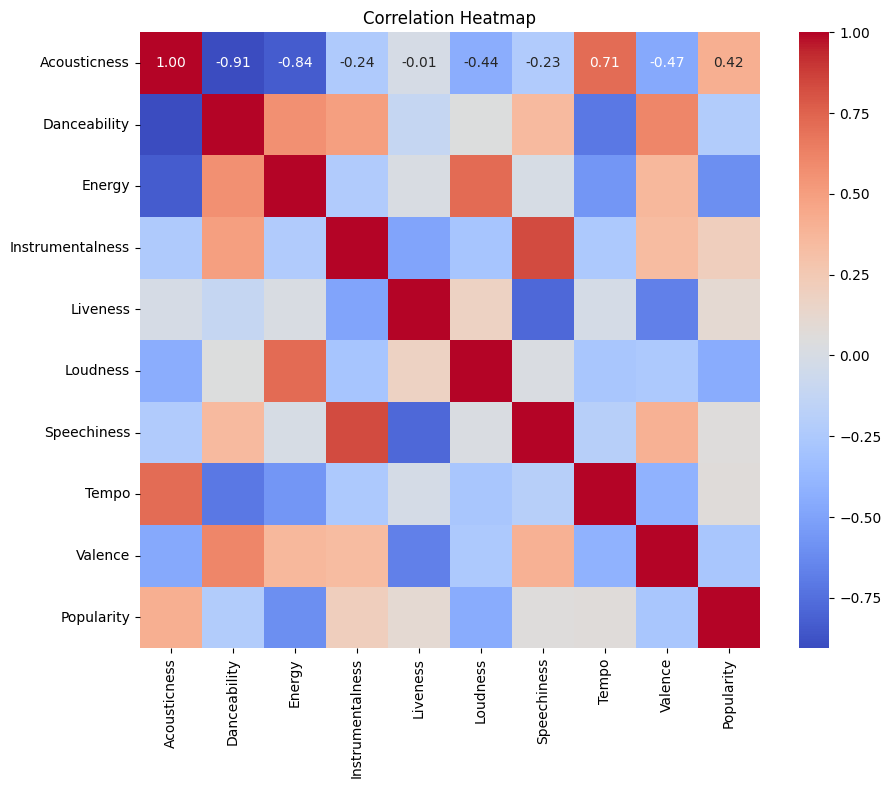

In [29]:
import pandas as pd

# Load the CSV file with the data
df = pd.read_csv('hw3_ariana_grande_songs_features.csv')

# List of features
features = ["Acousticness",
            "Danceability","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]

# Calculate and display Pearson correlation coefficients
correlations = df[features + ['Popularity']].corr(method='pearson')

# Print the correlation matrix
print(correlations)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 5:
Which songs from your scraped lyrics have the highest positive sentiment and lowest negative sentiment scores? Do the findings at hand make sense to you? Why or why?

In [33]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load your DataFrame with song lyrics
df = pd.read_csv('hw3emotionresults.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for lyrics
def calculate_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the sentiment analysis function to each row in the DataFrame
df['Sentiment_Score'] = df['Lyrics'].apply(calculate_sentiment_score)

# Sort the DataFrame by sentiment scores (ascending order for negative sentiment)
sorted_df = df.sort_values(by='Sentiment_Score', ascending=False)

# Save the sorted DataFrame to a new CSV file
sorted_df.to_csv('hw3_songs_with_sentiment_scores_sorted.csv', index=False)

# Print the sorted DataFrame with sentiment scores
print(sorted_df[['SongName', 'Sentiment_Score']])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/soudabeh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                           SongName  Sentiment_Score
7                                           The Way           0.9998
34                       The Way (feat. Mac Miller)           0.9998
45    The Way - Live from London (feat. Mac Miller)           0.9997
18                                       successful           0.9993
39   The Way - Spanglish Version (feat. Mac Miller)           0.9991
4                                         Lovin' It           0.9990
31                                        Lovin' It           0.9990
25                                    pete davidson           0.9985
16                                   God is a woman           0.9974
1                                            Baby I           0.9970
42                        Baby I - Live from London           0.9970
28                                           Baby I           0.9970
2                                       Right There           0.9966
11                               B

## 6:
Many singers at different levels use explicit words in their songs. Use the following list or something similar hQps://www.aQsavings.com/resources/entertainment/top-music- artists-who-curse-the-most/ to compare and contrast how the explicit words relate or differ between any two singers. 

Searching for songs by Kanye West...

Song 1: "’03 Bonnie & Clyde"
Song 2: "03 Electic Relaxation"
Song 3: "’03 Til Infinity"
Song 4: "100 Shiesty’s"
Song 5: "12,000 Acres"

Reached user-specified song limit (5).
Done. Found 5 songs.
Song: Love Lockdown
Searching for "Love Lockdown" by Kanye West...
Done.
Explicit Count: 0
Song: Jesus Walks
Searching for "Jesus Walks" by Kanye West...
Done.
Explicit Count: 2
Song: Black Skinhead
Searching for "Black Skinhead" by Kanye West...
Done.
Explicit Count: 17
Searching for songs by The Weeknd...

Song 1: "6 Inch"
Song 2: "6 Inch Heel"
Song 3: "Acquainted"
Song 4: "Adaptation"
Song 5: "After Hours"

Reached user-specified song limit (5).
Done. Found 5 songs.
Song: Blinding Lights
Searching for "Blinding Lights" by The Weeknd...
Done.
Explicit Count: 0
Song: Starboy
Searching for "Starboy" by The Weeknd...
Done.
Explicit Count: 10
Song: The Hills
Searching for "The Hills" by The Weeknd...
Done.
Explicit Count: 15
Total explicit words for Kanye We

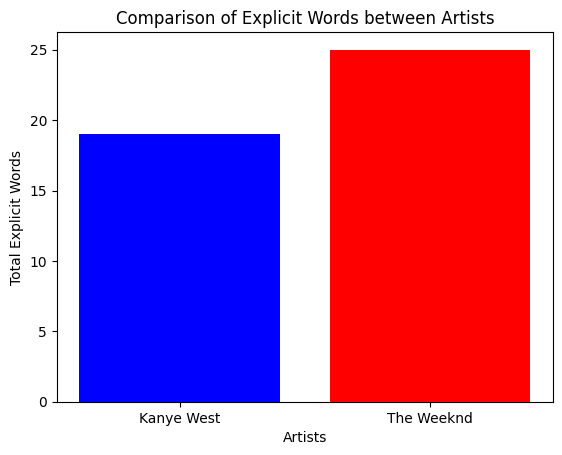

In [46]:
import lyricsgenius
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to count explicit words in lyrics
def count_explicit_words(lyrics, explicit_words):
    explicit_count = sum(lyrics.lower().count(word.lower()) for word in explicit_words)
    return explicit_count

# Function to retrieve lyrics for an artist
def get_lyrics(artist_name, songs_list, explicit_words):
    genius = lyricsgenius.Genius('okvEAd7iLkpCoaNpiB6jA4CBAF1yHEdH7CeGjm8RywEofVB3naWvbzA1-d3DKV52')  # Replace with your Genius API access token

    artist = genius.search_artist(artist_name, max_songs=5, sort="title", include_features=True)

    output = {"Artist": artist_name, "Song": [], "Lyrics": [], "Explicit Count": []}

    for song_name in songs_list:
        print(f"Song: {song_name}")
        try:
            song = artist.song(song_name)
            if song:
                lyrics = song.lyrics
                explicit_count = count_explicit_words(lyrics, explicit_words)
                print(f"Explicit Count: {explicit_count}")
                output['Song'].append(song_name)
                output['Lyrics'].append(lyrics)
                output['Explicit Count'].append(explicit_count)
        except Exception as e:
            print(f"Error fetching lyrics for {song_name}: {e}")

    return pd.DataFrame(output)

# Define explicit words
explicit_words = [
    "Bloody", "Bugger", "Bitch", "Bollocks", "Pissed",
    "Shit", "Bastard", "Damn", "Arse", "Asshole",
    "Bullshit", "Jesus Christ", "Son of a bitch",
    "Twat", "Bellend", "Cheese and crackers", "Cow",
    "Fuck", "Munter", "Asshat"
]

# Define artists and their songs
artists_data = [
    {"name": "Kanye West", "songs": ['Love Lockdown','Jesus Walks','Black Skinhead']},
    {"name": "The Weeknd", "songs": ['Blinding Lights', 'Starboy', 'The Hills']}
]

# Retrieve lyrics for artists
output_data = []

for artist_data in artists_data:
    artist_name = artist_data["name"]
    songs_list = artist_data["songs"]
    df = get_lyrics(artist_name, songs_list, explicit_words)
    output_data.append(df)

# Compare explicit word counts
for df in output_data:
    explicit_count = df['Explicit Count'].sum()
    artist_name = df['Artist'].iloc[0]
    print(f"Total explicit words for {artist_name}: {explicit_count}")

# List of explicit words and their frequency for each artist
def list_explicit_words_frequency(df):
    lyrics = ' '.join(df['Lyrics']).lower()
    word_frequency = {word: lyrics.count(word.lower()) for word in explicit_words}
    return word_frequency

for df in output_data:
    explicit_words_frequency = list_explicit_words_frequency(df)
    artist_name = df['Artist'].iloc[0]
    print(f"\nExplicit words and their frequency for {artist_name}:")
    for word, frequency in explicit_words_frequency.items():
        print(f"{word}: {frequency}")

# List of similar explicit words
explicit_words_frequency_artist1 = list_explicit_words_frequency(output_data[0])
explicit_words_frequency_artist2 = list_explicit_words_frequency(output_data[1])

similar_explicit_words = set(explicit_words_frequency_artist1.keys()).intersection(explicit_words_frequency_artist2.keys())

# List of different explicit words for each artist
different_explicit_words_artist1 = set(explicit_words_frequency_artist1.keys()).difference(explicit_words_frequency_artist2.keys())
different_explicit_words_artist2 = set(explicit_words_frequency_artist2.keys()).difference(explicit_words_frequency_artist1.keys())


# Visualization example
artists = [df['Artist'].iloc[0] for df in output_data]
explicit_counts = [df['Explicit Count'].sum() for df in output_data]

plt.bar(artists, explicit_counts, color=['blue', 'red'])
plt.xlabel('Artists')
plt.ylabel('Total Explicit Words')
plt.title('Comparison of Explicit Words between Artists')
plt.show()


##  7:
Select a singer who tends to use more explicit words in their songs. Scrape the lyrics of 5 different songs from different 5me points of this singer. Perform explicit word search on the lyrics. What are similarites and differences between the explicit words among the songs? Does the singer always use the same explicit words? 

Analyzing lyrics for 'Blinding Lights'...
Searching for "Blinding Lights" by The Weeknd...
Done.
Analyzing lyrics for 'Starboy'...
Searching for "Starboy" by The Weeknd...
Done.
Analyzing lyrics for 'The Hills'...
Searching for "The Hills" by The Weeknd...
Done.
Analyzing lyrics for 'In the Night'...
Searching for "In the Night" by The Weeknd...
Done.
Analyzing lyrics for 'Cant Feel My Face'...
Searching for "Cant Feel My Face" by The Weeknd...
Done.

Total explicit words for The Weeknd across all songs: 25

Explicit words and their frequency for 'Blinding Lights':

Explicit words and their frequency for 'Starboy':
Bitch: 2
Fuck: 8

Explicit words and their frequency for 'The Hills':
Bitch: 1
Fuck: 14

Explicit words and their frequency for 'In the Night':

Explicit words and their frequency for 'Cant Feel My Face':



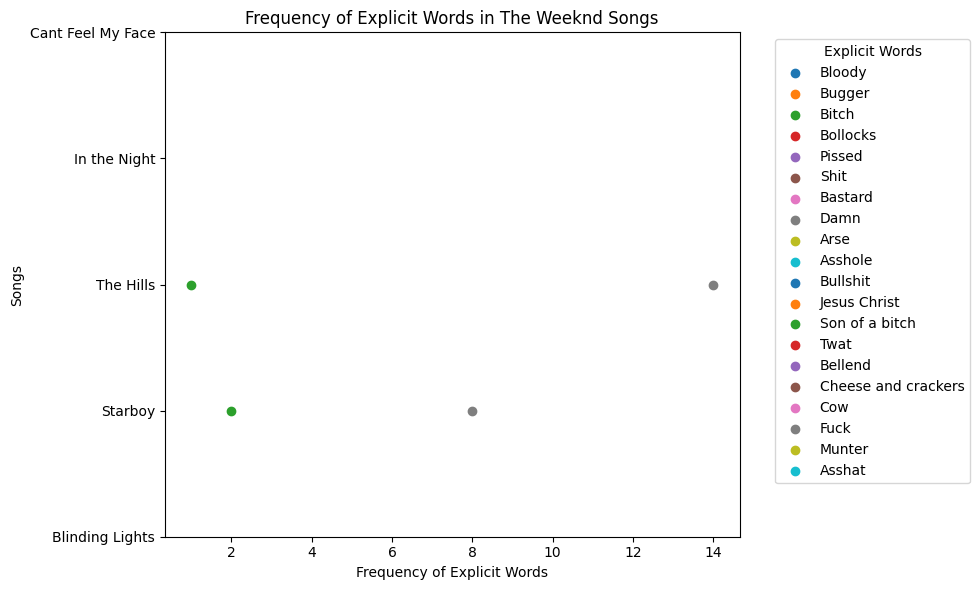

In [59]:
import lyricsgenius
import pandas as pd
import matplotlib.pyplot as plt


# Function to count explicit words in lyrics
def count_explicit_words(lyrics, explicit_words):
    explicit_count = sum(lyrics.lower().count(word.lower()) for word in explicit_words)
    return explicit_count

# Function to retrieve lyrics for a song
def get_lyrics(song_title):
    genius = lyricsgenius.Genius('okvEAd7iLkpCoaNpiB6jA4CBAF1yHEdH7CeGjm8RywEofVB3naWvbzA1-d3DKV52')  

    song = genius.search_song(song_title, "The Weeknd")
    
    if song:
        lyrics = song.lyrics
        explicit_count = count_explicit_words(lyrics, explicit_words)
        return lyrics, explicit_count
    else:
        return None, None

# Define explicit words
explicit_words = [
    "Bloody", "Bugger", "Bitch", "Bollocks", "Pissed",
    "Shit", "Bastard", "Damn", "Arse", "Asshole",
    "Bullshit", "Jesus Christ", "Son of a bitch",
    "Twat", "Bellend", "Cheese and crackers", "Cow",
    "Fuck", "Munter", "Asshat"
]

# Define songs to analyze
songs_list = ['Blinding Lights', 'Starboy', 'The Hills', 'In the Night', 'Cant Feel My Face']


# Define explicit words
explicit_words = [
    "Bloody", "Bugger", "Bitch", "Bollocks", "Pissed",
    "Shit", "Bastard", "Damn", "Arse", "Asshole",
    "Bullshit", "Jesus Christ", "Son of a bitch",
    "Twat", "Bellend", "Cheese and crackers", "Cow",
    "Fuck", "Munter", "Asshat"
]

# Create a DataFrame to store the results
output = {"Song": [], "Lyrics": [], "Explicit Count": []}

for song_title in songs_list:
    print(f"Analyzing lyrics for '{song_title}'...")
    lyrics, explicit_count = get_lyrics(song_title)
    if lyrics is not None:
        output["Song"].append(song_title)
        output["Lyrics"].append(lyrics)
        output["Explicit Count"].append(explicit_count)

df = pd.DataFrame(output)

# Compare explicit word counts
total_explicit_words = df['Explicit Count'].sum()
print(f"\nTotal explicit words for The Weeknd across all songs: {total_explicit_words}\n")

# List of explicit words and their frequency for each song
def list_explicit_words_frequency(lyrics):
    lyrics = lyrics.lower()
    word_frequency = {word: lyrics.count(word.lower()) for word in explicit_words if lyrics.count(word.lower()) > 0}
    return word_frequency

for index, row in df.iterrows():
    song_title = row['Song']
    explicit_words_frequency = list_explicit_words_frequency(row['Lyrics'])
    print(f"Explicit words and their frequency for '{song_title}':")
    for word, frequency in explicit_words_frequency.items():
        print(f"{word}: {frequency}")
    print()

# Visualization with explicit words marked
explicit_words_list = list(explicit_words)

fig, ax = plt.subplots(figsize=(10, 6))

for i, word in enumerate(explicit_words_list):
    x_values = [list_explicit_words_frequency(lyrics)[word] for lyrics in df['Lyrics'] if word.lower() in lyrics.lower()]
    y_values = [index for index in range(len(df)) if word.lower() in df['Lyrics'][index].lower()]

    plt.scatter(x_values, y_values, label=word)

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Song'])
plt.xlabel('Frequency of Explicit Words')
plt.ylabel('Songs')
plt.title('Frequency of Explicit Words in The Weeknd Songs')
plt.legend(title='Explicit Words', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()
